In [7]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os
import seaborn as sns
from scipy.stats import binned_statistic
import matplotlib
import matplotlib.backends.backend_pdf

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

#### redshift

Text(0, 0.5, '$\\sigma_{NMAD}$')

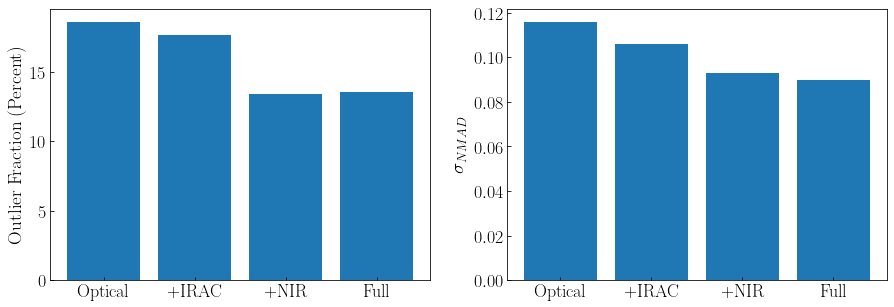

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5),sharex=True)

axs[0].bar([1,2,3,4],[18.6,17.6,13.4,13.5],tick_label=['Optical','+IRAC','+NIR','Full'])
axs[0].set_ylabel('Outlier Fraction (Percent)',fontsize=19)
axs[1].bar([1,2,3,4],[0.116,0.106,0.093,0.09],tick_label=['Optical','+IRAC','+NIR','Full'])
axs[1].set_ylabel('$\sigma_{NMAD}$',fontsize=19)

#### mass

In [15]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats/'

In [16]:
# the output catalogs (from graham)
cat_output_no_irac_nir_mass_name = graham_output_dir+'cat_out_nonirirac_il_formass.fits'
cat_output_no_irac_mass_name = graham_output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = graham_output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = graham_output_dir+'cat_out_allphot_il_formass.fits'
cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['optical only','no irac / with nir','no nir / with irac','full photometry']

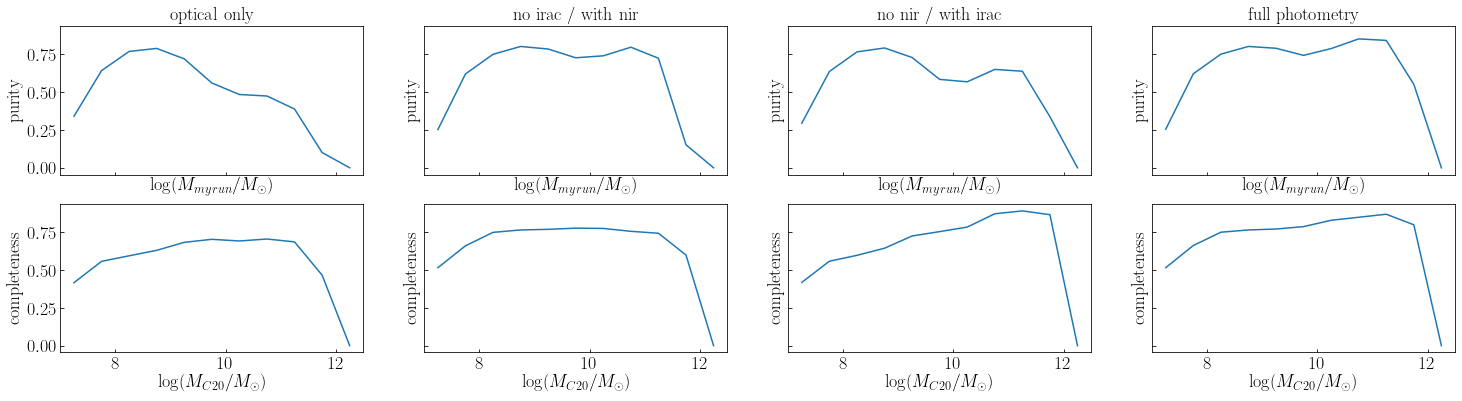

In [35]:
fig, axs = plt.subplots(2, 4, figsize = (25, 6),sharex=True,sharey=True)  

for k,cat_name in enumerate(cat_names):
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    
    purity_list = []
    comp_list = []
    bin_edges = np.linspace(7,12.5,12)
    for i in range(len(bin_edges)-1):
        cat_mymassbin = cat_output_c20added[np.logical_and(cat_output_c20added['MASS_MED_massrun']>bin_edges[i],cat_output_c20added['MASS_MED_massrun']<bin_edges[i+1])]
        cat_purity = cat_mymassbin[np.logical_and(cat_mymassbin['lp_mass_med']>bin_edges[i]-0.15,cat_mymassbin['lp_mass_med']<bin_edges[i+1]+0.15)]
        if len(cat_mymassbin)>0:
            purity = round(len(cat_purity)/len(cat_mymassbin),3)
        else:
            purity=0
        
        cat_c20massbin = cat_output_c20added[np.logical_and(cat_output_c20added['lp_mass_med']>bin_edges[i],cat_output_c20added['lp_mass_med']<bin_edges[i+1])]
        cat_comp = cat_c20massbin[np.logical_and(cat_c20massbin['MASS_MED_massrun']>bin_edges[i]-0.15, cat_c20massbin['MASS_MED_massrun']<bin_edges[i+1]+0.15)]
        if len(cat_c20massbin)>0:
            comp = round(len(cat_comp)/len(cat_c20massbin),3)
        else:
            comp=0
        
        purity_list.append(purity)
        comp_list.append(comp)
    
    axs[0][k].plot(bin_edges[:-1]+0.25, purity_list)
    axs[0][k].set_xlabel('$\log(M_{myrun}/M_\odot)$',fontsize=18)
    axs[0][k].set_ylabel('purity',fontsize=18) 
    axs[0][k].set_title(filter_selections[k],fontsize=18)
    axs[1][k].plot(bin_edges[:-1]+0.25, comp_list)
    axs[1][k].set_xlabel('$\log(M_{C20}/M_\odot)$',fontsize=18)
    axs[1][k].set_ylabel('completeness',fontsize=18)

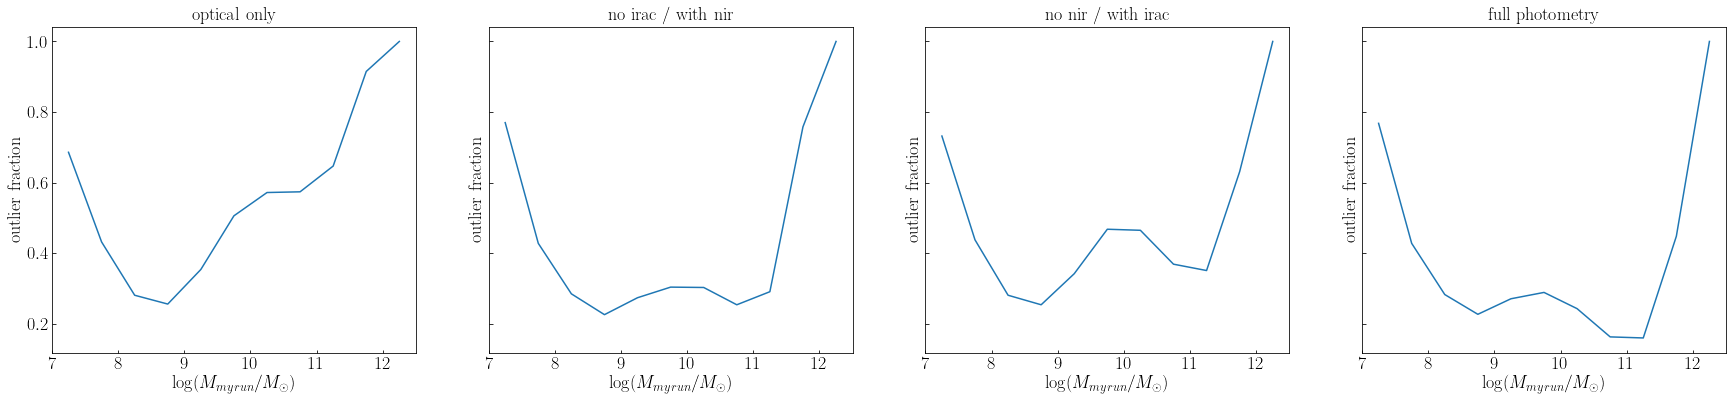

In [36]:
fig, axs = plt.subplots(1, 4, figsize = (30, 6),sharex=True,sharey=True)  

for k,cat_name in enumerate(cat_names):
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    
    outlier_frac_list = []
    bin_edges = np.linspace(7,12.5,12)
    for i in range(len(bin_edges)-1):
        cat_mymassbin = cat_output_c20added[np.logical_and(cat_output_c20added['MASS_MED_massrun']>bin_edges[i],cat_output_c20added['MASS_MED_massrun']<bin_edges[i+1])]
        cat_outliers = cat_mymassbin[abs(cat_mymassbin['MASS_MED_massrun']-cat_mymassbin['lp_mass_med'])>0.3]
        if len(cat_mymassbin)>0:
            outlier_frac = round(len(cat_outliers)/len(cat_mymassbin),3)
        else:
            outlier_frac=0
        
        outlier_frac_list.append(outlier_frac)
    
    axs[k].plot(bin_edges[:-1]+0.25, outlier_frac_list)
    axs[k].set_xlabel('$\log(M_{myrun}/M_\odot)$',fontsize=18)
    axs[k].set_ylabel('outlier fraction',fontsize=18)
    axs[k].set_title(filter_selections[k],fontsize=18)

#### SFQ

#### i-irac1 color